# Objective
* To build a machine learning model for binary classification of students scores as pass or fail using demographic data, lunch status, parental education level, and test preparation completion.

* To evaluate and compare the performance of various classification algorithms, including Logistic Regression, Decision Tree, SVC, and Random Forest, followed by ensemble techniques (Voting, Bagging, Gradient Boosting).

* To optimize model performance using hyperparameter tuning methods like GridSearchCV and RandomizedSearchCV, and finalize the model for predicting on unseen data.

* To demonstrate a complete machine learning pipeline: from loading and preprocessing data to saving and applying the model to new data.

# Methodology
1. Data Preprocessing:

* Categorical features encoded using LabelEncoder

* Numerical features (math, reading, writing scores) scaled with MinMaxScaler

* Target variable writing score converted to binary: pass (≥ 60%) and fail (< 60%)

2. Dataset Splitting:

* 80% for training, 20% for testing using train_test_split (random_state=42)

3. Feature Selection Techniques:

* SelectKBest with f_regression

* RFE (Recursive Feature Elimination)

* PCA (Principal Component Analysis)

* ExtraTreesRegressor for feature importance evaluation

3. Model Training and Comparison:

* Logistic Regression

* Decision Tree

* Random Forest

* VC (Support Vector Classifier)

* VotingClassifier (ensemble)

* BaggingClassifier

* GradientBoostingClassifier

4. Hyperparameter Tuning:

* GridSearchCV

* RandomizedSearchCV

5. Evaluation Metrics:

* Accuracy, Precision, Recall, F1 Score, ROC-AUC

* Results visualized using matplotlib and seaborn

6. Model Deployment:

* Encoders and scalers saved via joblib

* Applied to unseen data to evaluate generalization accuracy

# Tools Used

* Programming	- Python
* Data Analysis	- pandas, numpy
* Visualization	- matplotlib, seaborn
* Preprocessing	- LabelEncoder, MinMaxScaler
* ML Algorithms	- RandomForestClassifier, SVC, LogisticRegression,  DecisionTreeClassifier, VotingClassifier, GradientBoostingClassifier,  BaggingClassifier
* Feature Selection	- SelectKBest, RFE, PCA
* Model Evaluation - accuracy_score, f1_score, roc_auc_score, etc.
* Tuning - GridSearchCV, RandomizedSearchCV
* Model Saving - joblib
* Platform - Google Colab

# Discussion
* Dependency Discovery: The correlation matrix revealed a strong link between reading score and writing score, which is expected but could also increase the risk of overfitting.

* Base model accuracy using RandomForestClassifier reached ~95% on training data but dropped significantly on external test data, indicating weak generalization capability.

* Ensemble methods (Voting, Bagging, Gradient Boosting) offered more robust results. Gradient Boosting in particular showed the most balanced performance across metrics.

* Grid and Random Search helped fine-tune hyperparameters, but the accuracy improvement was marginal (~1–2%), suggesting the dataset itself might be limited in size or diversity.

* Key Issue — Overfitting and Data Sensitivity: The distribution in examsss4.csv differed noticeably from the training dataset, causing the model to underperform without retraining or transfer learning.



# Load libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from scipy.stats import randint
from sklearn.ensemble import VotingClassifier, BaggingClassifier, GradientBoostingClassifier
import joblib

# Load dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving exams.csv to exams.csv


In [3]:
data = read_csv('exams.csv')
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80
7,female,group B,some high school,standard,none,46,61,58
8,male,group C,some high school,standard,none,80,75,73
9,female,group C,bachelor's degree,standard,completed,57,69,77


# Descriptive Statistics

In [4]:
print(data.describe())
print("Data shape is", data.shape)
print("Data type is", data.dtypes)
class_counts = data.groupby('lunch').size()
print(class_counts)
data.head()

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.000000      15.000000
25%      58.000000      61.000000      59.000000
50%      68.000000      70.500000      70.000000
75%      79.250000      80.000000      80.000000
max     100.000000     100.000000     100.000000
Data shape is (1000, 8)
Data type is gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
lunch
free/reduced    340
standard        660
dtype: int64


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## Data visualization

In [5]:
le = LabelEncoder()
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

scaler = MinMaxScaler()
data[['math score', 'reading score', 'writing score']] = scaler.fit_transform(data[['math score', 'reading score', 'writing score']])
data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,0.517647,0.600000,0.741176
1,1,3,0,1,1,0.952941,0.906667,0.847059
2,0,3,4,0,1,0.494118,0.680000,0.729412
3,1,1,4,0,1,0.647059,0.600000,0.564706
4,0,3,0,1,1,0.800000,0.800000,0.835294
5,1,2,5,1,1,0.623529,0.426667,0.458824
6,0,4,0,1,1,0.788235,0.773333,0.764706
7,0,1,5,1,1,0.364706,0.480000,0.505882
8,1,2,5,1,1,0.764706,0.666667,0.682353
9,0,2,1,1,0,0.494118,0.586667,0.729412


#### NOW DATA CLEANED

Gender
*   0 = female
*   1 = male


Race/ethnicity
*   0 - group A
*   1 - group B
*   2 - group C
*   3 - group D
*   4 - group E


Parental level of education
*   0 = associate's degree
*   1 = bachelor's degree
*   2 = high school
*   3 = master's degree
*   4 = some college


Lunch
*   0 = standart
*   1 = free/reduced


Test preparation course
*   0 = none
*   1 = completed

In [6]:
data.corr(method='pearson')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.048978,0.025942,0.015708,0.032641,0.195992,-0.215775,-0.281707
race/ethnicity,0.048978,1.000000,0.042983,0.006608,-0.004918,0.235162,0.153572,0.166671
parental level of education,0.025942,0.042983,1.000000,0.038919,0.011904,-0.093824,-0.100450,-0.119580
lunch,0.015708,0.006608,0.038919,1.000000,0.093498,0.372465,0.241319,0.234400
test preparation course,0.032641,-0.004918,0.011904,0.093498,1.000000,-0.119925,-0.223132,-0.321520
math score,0.195992,0.235162,-0.093824,0.372465,-0.119925,1.000000,0.811767,0.790055
reading score,-0.215775,0.153572,-0.100450,0.241319,-0.223132,0.811767,1.000000,0.948909
writing score,-0.281707,0.166671,-0.119580,0.234400,-0.321520,0.790055,0.948909,1.000000


In [7]:
data.skew()

,0
gender,-0.032052
race/ethnicity,-0.113370
parental level of education,-0.075586
lunch,-0.676536
test preparation course,-0.657772
math score,-0.281200
reading score,-0.183505
writing score,-0.214574


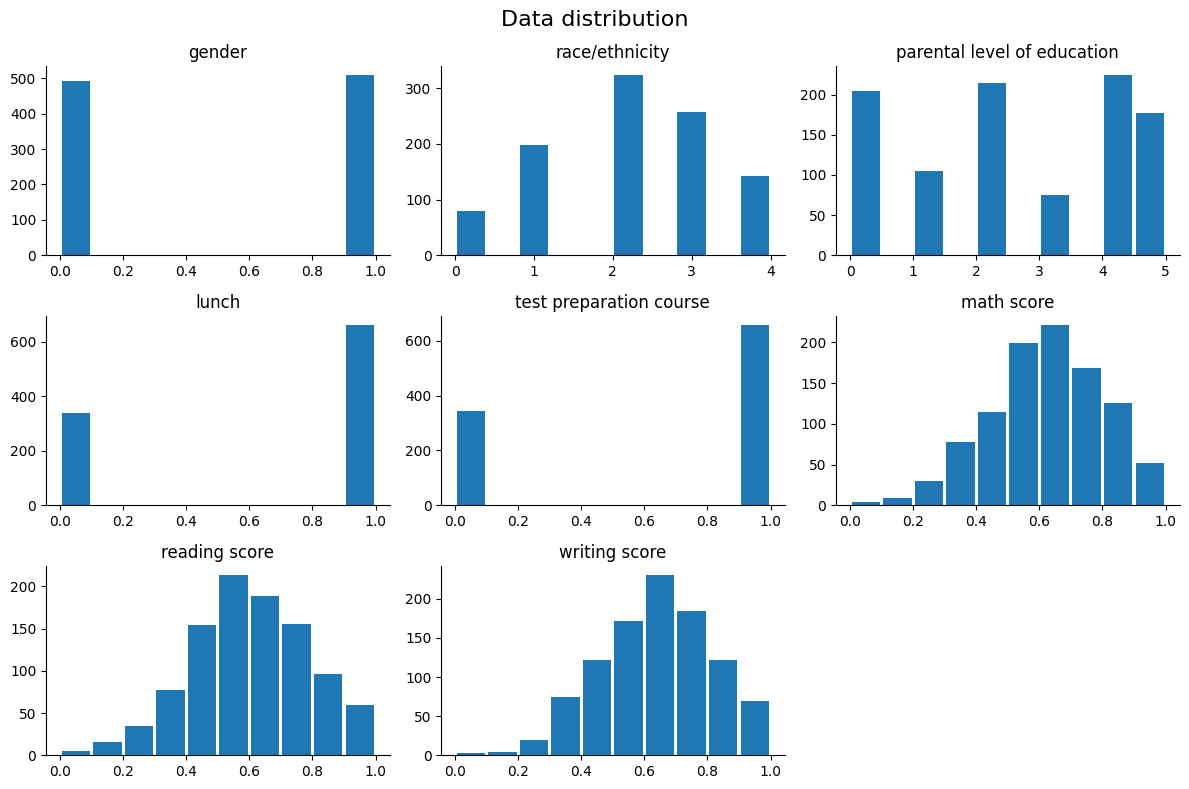

In [8]:
ax = data.hist(bins=10, figsize=(12, 8), grid=False, rwidth=0.9)

for x in ax.flatten():
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)

plt.suptitle('Data distribution', fontsize=16)

plt.tight_layout()
plt.show()

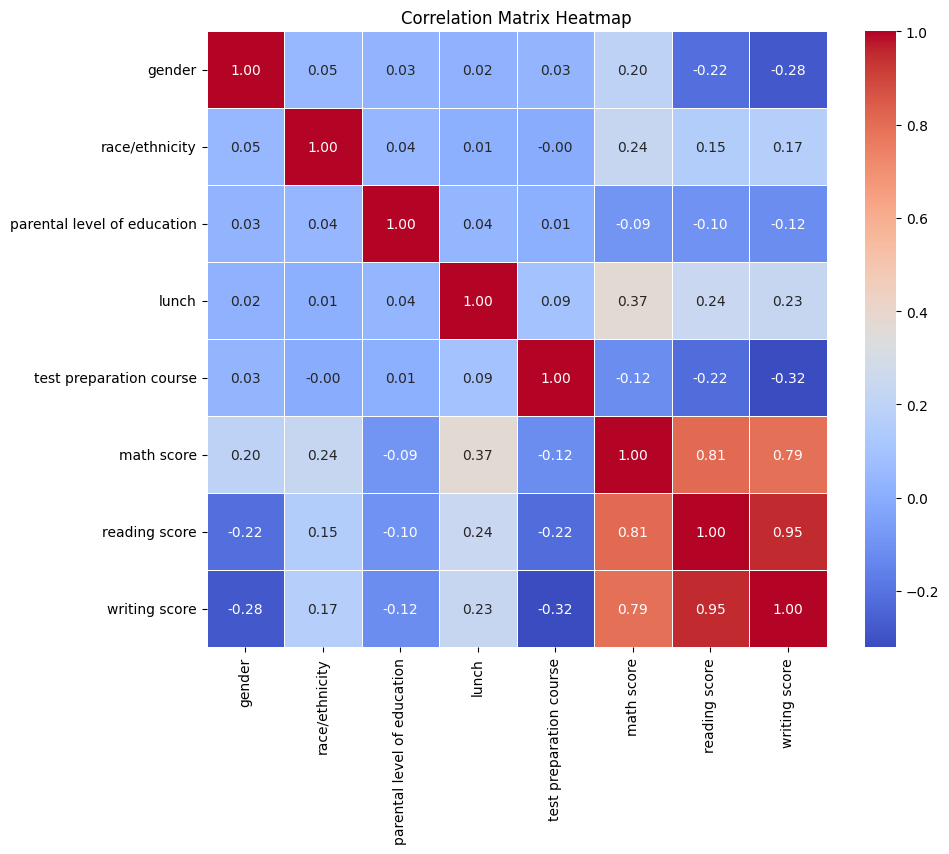

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

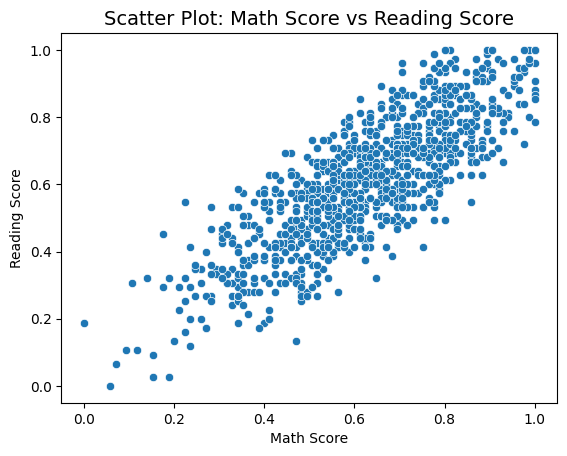

In [10]:
sns.scatterplot(x='math score', y='reading score', data=data)
plt.title('Scatter Plot: Math Score vs Reading Score', fontsize=14)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

## Data Cleaning

In [11]:
# 1.Univariate Selection
from sklearn.feature_selection import SelectKBest, f_regression
from numpy import set_printoptions
X = data.drop(columns=['math score', 'reading score', 'writing score'])
Y = data['writing score']

test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
print(features[0:5, :])

[ 86.027  28.516  14.478  58.021 115.063]
[[0 3 1 0]
 [1 3 1 1]
 [0 3 0 1]
 [1 1 0 1]
 [0 3 1 1]]


In [12]:
# 2. Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False  True  True]
Feature Ranking: [1 2 3 1 1]


In [13]:
# 3. Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)

print("Explained Variance:", fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.615 0.251 0.049]
[[ 0.008  0.047  0.999  0.011  0.003]
 [ 0.025  0.999 -0.047  0.002 -0.003]
 [ 0.777 -0.02  -0.012  0.403  0.482]]


In [14]:
# 4. Feature Importance
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, Y)

print(model.feature_importances_)

[0.174 0.217 0.212 0.161 0.235]


In [15]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,0.517647,0.600000,0.741176
1,1,3,0,1,1,0.952941,0.906667,0.847059
2,0,3,4,0,1,0.494118,0.680000,0.729412
3,1,1,4,0,1,0.647059,0.600000,0.564706
4,0,3,0,1,1,0.800000,0.800000,0.835294


## Split-out validation dataset

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

## Test options and evaluate metrics

In [20]:
def categorize_binary(score):
    return "pass" if score >= 0.6 else "fail"

Y = data["writing score"].apply(categorize_binary)
X = data.drop(columns=["writing score"])

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="pass", zero_division=0)
recall = recall_score(y_test, y_pred, pos_label="pass", zero_division=0)
f1 = f1_score(y_test, y_pred, pos_label="pass", zero_division=0)
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob)

print(f"\nAccuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")


Accuracy:  0.875
Precision: 0.908
Recall:    0.901
F1 Score:  0.904
ROC-AUC:   0.963


# Spot Check Algorithms

In [21]:
models = {
    'Logistic Regr-on': LogisticRegression(random_state=42),
    'Dec. Tree': DecisionTreeClassifier(random_state=42),
    'Random For.': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'SVC': SVC(probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label="pass", zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label="pass", zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label="pass", zero_division=0)
    roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, score in metrics.items():
        print(f"{metric_name}: {score:.3f}")


Logistic Regr-on:
Accuracy: 0.885
Precision: 0.903
Recall: 0.924
F1 Score: 0.913
ROC-AUC: 0.965

Dec. Tree:
Accuracy: 0.890
Precision: 0.916
Recall: 0.916
F1 Score: 0.916
ROC-AUC: 0.878

Random For.:
Accuracy: 0.875
Precision: 0.908
Recall: 0.901
F1 Score: 0.904
ROC-AUC: 0.963

SVC:
Accuracy: 0.895
Precision: 0.917
Recall: 0.924
F1 Score: 0.920
ROC-AUC: 0.950


# Compare Algorithms

                  Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regr-on     0.885   0.902985  0.923664  0.913208  0.964819
Dec. Tree            0.890   0.916031  0.916031  0.916031  0.878305
Random For.          0.875   0.907692  0.900763  0.904215  0.963049
SVC                  0.895   0.916667  0.923664  0.920152  0.949552


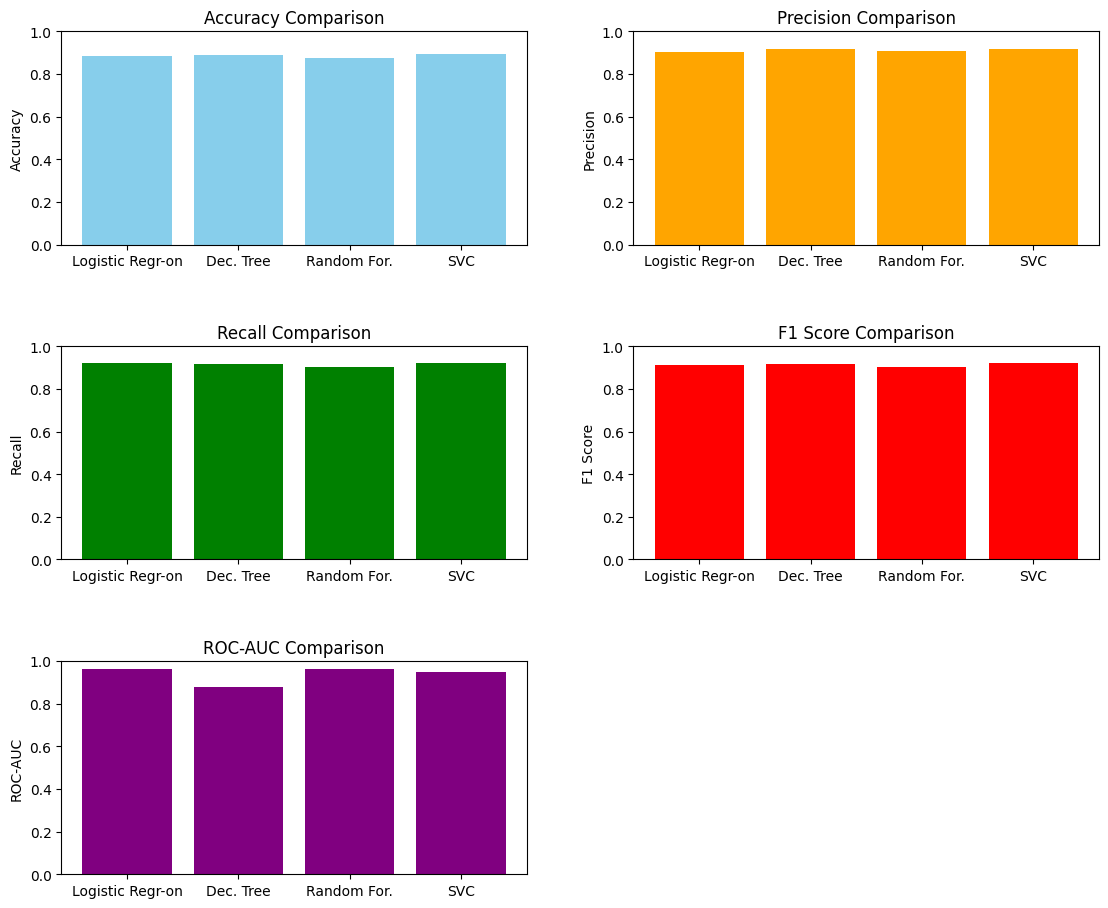

In [22]:
results_df = pd.DataFrame(results).T
print(results_df)

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Accuracy Bar Plot
axes[0, 0].bar(results_df.index, results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Precision Bar Plot
axes[0, 1].bar(results_df.index, results_df['Precision'], color='orange')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_ylim(0, 1)

# Recall Bar Plot
axes[1, 0].bar(results_df.index, results_df['Recall'], color='green')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_ylim(0, 1)

# F1 Score Bar Plot
axes[1, 1].bar(results_df.index, results_df['F1 Score'], color='red')
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_ylim(0, 1)

# ROC-AUC Bar Plot
axes[2, 0].bar(results_df.index, results_df['ROC-AUC'], color='purple')
axes[2, 0].set_title('ROC-AUC Comparison')
axes[2, 0].set_ylabel('ROC-AUC')
axes[2, 0].set_ylim(0, 1)

axes[2, 1].axis('off')

fig.tight_layout(pad=4.0)
plt.show()

# Algorithm Tuning

Baseline Accuracy: 0.875
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best Parameters (GridSearchCV): {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Val Score: 0.940
Test Accuracy after GridSearchCV: 0.885
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters (RandomizedSearchCV): {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 61}
Best Cross-Val Score: 0.940
Test Accuracy after RandomizedSearchCV: 0.880

Accuracy Comparison:
               Accuracy
Baseline          0.875
Grid Search       0.885
Random Search     0.880


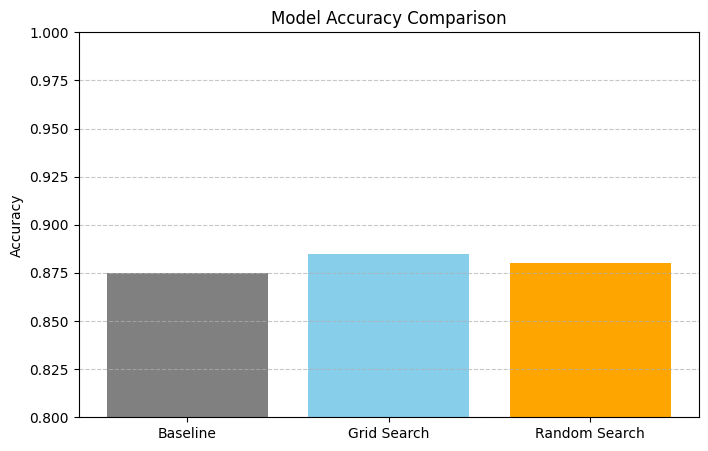

In [23]:
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)
y_pred_baseline = baseline_rf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.3f}")

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)
print(f"\nBest Parameters (GridSearchCV): {grid_search.best_params_}")
print(f"Best Cross-Val Score: {grid_search.best_score_:.3f}")

best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(X_test)
grid_accuracy = accuracy_score(y_test, y_pred_grid)
print(f"Test Accuracy after GridSearchCV: {grid_accuracy:.3f}")

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(X_train, y_train)
print(f"\nBest Parameters (RandomizedSearchCV): {random_search.best_params_}")
print(f"Best Cross-Val Score: {random_search.best_score_:.3f}")

best_rf_random = random_search.best_estimator_
y_pred_random = best_rf_random.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred_random)
print(f"Test Accuracy after RandomizedSearchCV: {random_accuracy:.3f}")

results = {
    'Baseline': baseline_accuracy,
    'Grid Search': grid_accuracy,
    'Random Search': random_accuracy
}

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print("\nAccuracy Comparison:")
print(results_df)

plt.figure(figsize=(8, 5))
plt.bar(results_df.index, results_df['Accuracy'], color=['gray', 'skyblue', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ensembles

## Voting Classifier

In [24]:
log_clf = LogisticRegression(max_iter=5000, random_state=42)
svc_clf = SVC(probability=True, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svc', svc_clf),
        ('rf', rf_clf)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_acc:.3f}")

Voting Classifier Accuracy: 0.890


## Bagging Classifier

In [25]:
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
bag_acc = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Classifier Accuracy: {bag_acc:.3f}")

Bagging Classifier Accuracy: 0.870


## Gradient Boosting Classifier

In [26]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_acc:.3f}")

Gradient Boosting Accuracy: 0.860


## Results


Ensemble Model Accuracy Comparison:
                    Accuracy
Voting Classifier       0.89
Bagging Classifier      0.87
Gradient Boosting       0.86


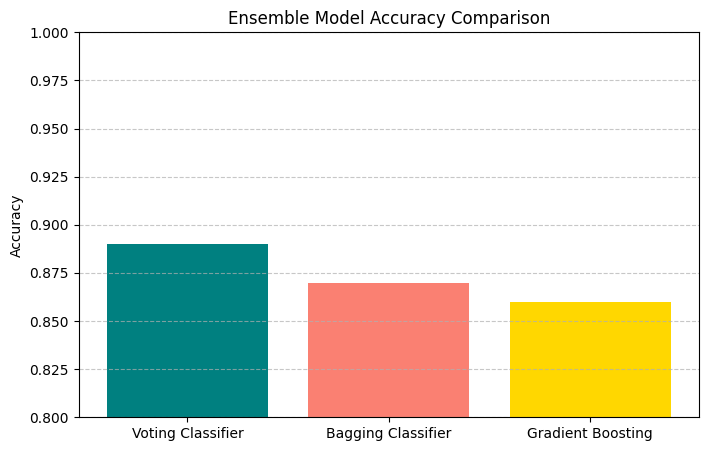

In [27]:
ensemble_results = {
    'Voting Classifier': voting_acc,
    'Bagging Classifier': bag_acc,
    'Gradient Boosting': gb_acc
}

ensemble_df = pd.DataFrame.from_dict(ensemble_results, orient='index', columns=['Accuracy'])

print("\nEnsemble Model Accuracy Comparison:")
print(ensemble_df)

plt.figure(figsize=(8, 5))
plt.bar(ensemble_df.index, ensemble_df['Accuracy'], color=['teal', 'salmon', 'gold'])
plt.title("Ensemble Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Finalize model

## Prediction on validation dataset

In [28]:
validation_data = data.sample(5, random_state=42).copy()

for col in categorical_columns:
    reverse_map = {i: label for i, label in enumerate(encoders[col].classes_)}
    validation_data[col] = validation_data[col].map(reverse_map)

for col in categorical_columns:
    validation_data[col] = encoders[col].transform(validation_data[col])

validation_data[['math score', 'reading score', 'writing score']] = scaler.transform(
    validation_data[['math score', 'reading score', 'writing score']]
)

if 'writing score' in validation_data.columns:
    validation_data = validation_data.drop(columns=['writing score'])

val_pred_labels = best_rf_random.predict(validation_data)
val_pred_proba = best_rf_random.predict_proba(validation_data)

print("Predicted Labels:", val_pred_labels)
print("Predicted Probabilities:", val_pred_proba)

Predicted Labels: ['fail' 'fail' 'fail' 'fail' 'fail']
Predicted Probabilities: [[0.966 0.034]
 [0.967 0.033]
 [0.976 0.024]
 [0.996 0.004]
 [1.    0.   ]]


## Сreate standalone model on entire training dataset

In [59]:
from google.colab import files
uploaded = files.upload()

Saving examsss3.csv to examsss3 (1).csv


In [60]:
datatest = pd.read_csv('examsss3.csv', sep=';')
# datatest.head()

In [61]:
le = LabelEncoder()
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    datatest[col] = le.fit_transform(datatest[col])
    encoders[col] = le

scaler = MinMaxScaler()
datatest[['math score', 'reading score', 'writing score']] = scaler.fit_transform(datatest[['math score', 'reading score', 'writing score']])
datatest.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,0.467532,0.578125,0.703125
1,1,3,0,1,1,0.948052,0.937500,0.843750
2,0,3,4,0,1,0.441558,0.671875,0.687500
3,1,1,4,0,1,0.610390,0.578125,0.468750
4,0,3,0,1,1,0.779221,0.812500,0.828125
5,1,2,5,1,1,0.584416,0.375000,0.328125
6,0,4,0,1,1,0.766234,0.781250,0.734375
7,0,1,5,1,1,0.298701,0.437500,0.390625
8,1,2,5,1,1,0.740260,0.656250,0.625000
9,0,2,1,1,0,0.441558,0.562500,0.687500


In [62]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score

joblib.dump(encoders, "encoders.joblib")
joblib.dump(scaler, "scaler.joblib")

X_new = datatest.drop(columns=["writing score"])
y_true = datatest["writing score"].apply(lambda x: "pass" if x >= 0.6 else "fail")
y_pred = model.predict(X_new)

accuracy = accuracy_score(y_true, y_pred)
print(f" Accuracy on new data: {accuracy:.3f}")

results = datatest.copy()
results['Actual'] = y_true
results['Predicted'] = y_pred
results.head(40)

 Accuracy on new data: 0.909


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Actual,Predicted
0,0,3,4,1,0,0.467532,0.578125,0.703125,pass,pass
1,1,3,0,1,1,0.948052,0.937500,0.843750,pass,pass
2,0,3,4,0,1,0.441558,0.671875,0.687500,pass,pass
3,1,1,4,0,1,0.610390,0.578125,0.468750,fail,fail
4,0,3,0,1,1,0.779221,0.812500,0.828125,pass,pass
5,1,2,5,1,1,0.584416,0.375000,0.328125,fail,fail
6,0,4,0,1,1,0.766234,0.781250,0.734375,pass,pass
7,0,1,5,1,1,0.298701,0.437500,0.390625,fail,fail
8,1,2,5,1,1,0.740260,0.656250,0.625000,pass,pass
9,0,2,1,1,0,0.441558,0.562500,0.687500,pass,pass
